In [31]:
import os
import numpy as np
import pandas as pd

import pymatgen as pg


In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [33]:

def local_min(df):

    df['dy'] = df['Edis'].diff()

    df['sign_dy'] = np.sign(df['dy'])
    df['sign_change'] = df['sign_dy'].diff()

    # Indices of local maxima: derivative goes from negative (-1) to positive (+1)
    local_min_indices = df.index[(df['sign_change'] > 0)]

    if len(local_min_indices) == 0:
        print('No local min found')
        return None
    local_mins = df.loc[local_min_indices, ['cell_length', 'Edis']].reset_index(drop=True)

    return local_mins

def local_max(df):
    df['dy'] = df['Edis'].diff()

    df['sign_dy'] = np.sign(df['dy'])
    df['sign_change'] = df['sign_dy'].diff()
    
    # Indices of local maxima: derivative goes from negative (-1) to positive (+1)
    local_min_indices = df.index[(df['sign_change'] < 0)]

    if len(local_min_indices) == 0:
        print('No local max found')
        return None
    local_max = df.loc[local_min_indices, ['cell_length', 'Edis']].reset_index(drop=True)
    return local_max

In [34]:
def finding_diff(df):
    abs_max = df['Edis'].iloc[-1]
    max_val = local_max(df)
    min_val = local_min(df)

    if max_val is None or min_val is None:
        return 0
    
    diff = (abs_max + max_val['Edis'][0])/2 - min_val['Edis'][0]

    return diff

In [35]:
from pymatgen.core import Structure

In [36]:
#list all folders inside li_d3s
li_d3s = os.listdir("li_d3s")

results = []

df = pd.DataFrame()
cnt=0
for items in li_d3s:
    cnt+=1
    #get the path of each folder
    path = os.path.join("li_d3s", items)
    # print(items)
    
    #ignore .DS_Store
    if items == ".DS_Store" or items == 'ZnN6_1195863':
        continue
    file = os.path.join(path, f'{items}.csv')
    struct_file = os.path.join(path, 'POSCAR')
    df = pd.read_csv(file)
    print(f"Reading {file}")

    struct = Structure.from_file(struct_file)
    sites = struct.num_sites

    # print(struct.composition['Li'])
    li_sites = struct.composition['Zn']
    counter_ion_sites = struct.composition[struct.composition.elements[1]]
   
    diff_energy = finding_diff(df)
    print(f'Composition {struct.composition}')
    print(f'diff per toal sites {diff_energy/sites}')
    print(f'diff per Zn sites {diff_energy/li_sites}')
    print('-----------------------------------')

    result = {
        "Symbol": struct.composition.elements[0] if struct.composition.elements[0].symbol != 'Zn' else struct.composition.elements[1],
        "Structure": struct.composition,
        "Total Sites": sites,
        "Zn Sites": li_sites,
        "Counter Ion Sites": counter_ion_sites,
        "Diff Energy": diff_energy,
        "Diff per Total Sites": diff_energy/sites,
        "Diff per Zn Sites": diff_energy/li_sites,
        "Diff per Counter Ion Sites": diff_energy/counter_ion_sites,
        "Composition": str(struct.composition)
    }

    results.append(result)
print(f'total structure analysed = {cnt}')
    

Reading li_d3s/ZnS_554999/ZnS_554999.csv
Composition Zn24 S24
diff per toal sites 0.0026581394594022076
diff per Zn sites 0.005316278918804415
-----------------------------------
Reading li_d3s/ZnS_555280/ZnS_555280.csv
Composition Zn6 S6
diff per toal sites 0.0026597578801031622
diff per Zn sites 0.0053195157602063245
-----------------------------------
Reading li_d3s/ZnS_1245201/ZnS_1245201.csv
Composition Zn50 S50
diff per toal sites 0.002314132825237235
diff per Zn sites 0.00462826565047447
-----------------------------------
Reading li_d3s/ZnO_1245209/ZnO_1245209.csv
Composition Zn40 O40
diff per toal sites 0.0031598807942439565
diff per Zn sites 0.006319761588487913
-----------------------------------
Reading li_d3s/ZnS_555079/ZnS_555079.csv
Composition Zn28 S28
diff per toal sites 0.0026449455675877946
diff per Zn sites 0.005289891135175589
-----------------------------------
Reading li_d3s/ZnS_1245034/ZnS_1245034.csv
Composition Zn50 S50
diff per toal sites 0.0027072879057935
d

### for individual elements

In [37]:

file = "../Li_bulk/Li_fcc/Li_fcc.csv"
struct_file = '../Li_bulk/Li_fcc/POSCAR'

df = pd.read_csv(file)
print(f"Reading {file}")
struct = Structure.from_file(struct_file)
sites = struct.num_sites
# print(struct.composition['Li'])
li_sites = struct.composition['Li']

diff_energy = finding_diff(df)
print(f'Composition {struct.composition}')
print(f'diff per toal sites {diff_energy/sites}')
print(f'diff per Li sites {diff_energy/li_sites}')
print('-----------------------------------')
result = {
    "Symbol": struct.composition.elements[0] if struct.composition.elements[0].symbol != 'Zn' else struct.composition.elements[1],
    "Structure": struct.composition,
    "Total Sites": sites,
    "Li Sites": li_sites,
    "Diff Energy": diff_energy,
    "Diff per Total Sites": diff_energy/sites,
    "Diff per Li Sites": diff_energy/li_sites,
    "Composition": str(struct.composition)
}

result

FileNotFoundError: [Errno 2] No such file or directory: '../Li_bulk/Li_fcc/Li_fcc.csv'

In [38]:
results_df = pd.DataFrame(results)
results_df.to_csv("analysis_results.csv", index=False)

print(f"Total str.uctures analysed = {cnt}")
# print("Results saved to analysis_results.csv")

results_df

Total str.uctures analysed = 181


,Symbol,Structure,Total Sites,Zn Sites,Counter Ion Sites,Diff Energy,Diff per Total Sites,Diff per Zn Sites,Diff per Counter Ion Sites,Composition
0,S,"(Zn, S)",48,24.0,24.0,0.127591,0.002658,0.005316,0.005316,Zn24 S24
1,S,"(Zn, S)",12,6.0,6.0,0.031917,0.002660,0.005320,0.005320,Zn6 S6
2,S,"(Zn, S)",100,50.0,50.0,0.231413,0.002314,0.004628,0.004628,Zn50 S50
3,O,"(Zn, O)",80,40.0,40.0,0.252790,0.003160,0.006320,0.006320,Zn40 O40
4,S,"(Zn, S)",56,28.0,28.0,0.148117,0.002645,0.005290,0.005290,Zn28 S28
...,...,...,...,...,...,...,...,...,...,...
175,S,"(Zn, S)",100,50.0,50.0,0.226645,0.002266,0.004533,0.004533,Zn50 S50
176,S,"(Zn, S)",24,12.0,12.0,0.060083,0.002503,0.005007,0.005007,Zn12 S12
177,S,"(Zn, S)",36,18.0,18.0,0.095688,0.002658,0.005316,0.005316,Zn18 S18
178,S,"(Zn, S)",100,50.0,50.0,0.234294,0.002343,0.004686,0.004686,Zn50 S50


### Thougest part is to make the Feature functions data 


In [39]:
props = pd.read_csv('../mixed_comps/PubChemElements_all.csv')
polarisability = pd.read_csv('../elements_polarizability.csv')

props = props[['Symbol', 'AtomicMass','AtomicRadius','Electronegativity','IonizationEnergy','ElectronAffinity']]

In [43]:
all_props = []
cnt = 0
for items in li_d3s:
    # cnt+=1
    #get the path of each folder
    path = os.path.join("li_d3s", items)
    # print(items)
    
    #ignore .DS_Store
    if items == ".DS_Store" or items== 'ZnN6_1195863':
        continue
    file = os.path.join(path, f'{items}.csv')
    struct_file = os.path.join(path, 'POSCAR')


    struct = Structure.from_file(struct_file)
    sites = struct.num_sites

    vol_site = struct.volume/sites
    # print(density)

    # print(struct.composition.elements[1])

    elem = struct.composition.elements[0] if(struct.composition.elements[1].symbol == 'Zn')  else struct.composition.elements[1]

    print(elem)
    # print(elem.symbol == 'Ge')

    matched_row = props[props['Symbol'] == elem.symbol]
    elem_polarizability = polarisability[polarisability['Symbol'] == elem.symbol]

    space_group = struct.get_space_group_info()


    
    print(struct.composition.reduced_formula)
    # DiffPerLi = results_df[results_df['Symbol'] == elem.symbol]
    # matched_row.add('Polarizability', elem_polarizability['Polarizability'].values[0])
    matched_row['Polarizability'] = elem_polarizability['Polarizability'].values[0]
    matched_row['results_per_total'] = results_df['Diff per Total Sites'][cnt]*1000
    matched_row['results_per_zn'] = results_df['Diff per Zn Sites'][cnt]*1000
    # matched_row['TotalSites'] = results_df['Total Sites'][cnt]
    matched_row['ZnSites'] = results_df['Zn Sites'][cnt]/sites
    matched_row['CounterIonSites'] = results_df['Counter Ion Sites'][cnt]/sites
    matched_row['results_per_counter_ion'] = results_df['Diff per Counter Ion Sites'][cnt]
    # matched_row['Diff per Li Sites'] = DiffPerLi['Diff per Li Sites'].values[0]
    matched_row['res_per_volm_per_site'] = results_df['Diff per Total Sites'][cnt]/vol_site
    matched_row['Result']=  results_df['Diff per Total Sites'][cnt]/vol_site*1000
    matched_row['SpaceGroup'] = space_group[0]
    matched_row['SpaceGroupNumber'] = space_group[1]
    matched_row['Total Sites'] = sites

    matched_row["Reduced Formula"] = struct.composition.reduced_formula
    all_props.append(matched_row)

    cnt+=1

all_props_df = pd.concat(all_props, ignore_index=True)
    

S
ZnS
S
ZnS
S
ZnS
O
ZnO
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
N
ZnN
N
Zn3N2
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
N
ZnN6
S
ZnS
S
ZnS
N
ZnN6
S
ZnS
S
ZnS
S
ZnS
O
ZnO
S
ZnS
S
ZnS
S
ZnS
N
ZnN6
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
N
Zn3N2
S
ZnS
N
ZnN
S
ZnS
S
ZnS
C
ZnC2
S
ZnS
S
ZnS
O
ZnO
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
O
ZnO2
S
ZnS
S
ZnS
O
ZnO


/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_79399/799241885.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_row['Polarizability'] = elem_polarizability['Polarizability'].values[0]
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_79399/799241885.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_row['results_per_total'] = results_df['Diff per Total Sites'][cnt]*1000
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_79399/799241885.py:41: SettingWithCop

S
ZnS
S
ZnS
S
ZnS
O
ZnO
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS2
S
ZnS
S
ZnS
S
ZnS
C
Zn3C
S
ZnS
S
ZnS
O
ZnO
S
ZnS
O
ZnO2
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
N
ZnN
O
ZnO
S
ZnS
N
Zn3N
O
ZnO2
S
ZnS
S
ZnS
O
ZnO
S
ZnS
N
Zn3N
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
N
ZnN
S
ZnS
O
ZnO
S
ZnS
N
Zn3N2
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
O
ZnO
O
ZnO2
S
ZnS
S
ZnS
N
ZnN6
S
ZnS
S
ZnS
S
ZnS
S
ZnS
O
ZnO
S
ZnS
S
ZnS
C
Zn3C


/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_79399/799241885.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_row['Polarizability'] = elem_polarizability['Polarizability'].values[0]
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_79399/799241885.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_row['results_per_total'] = results_df['Diff per Total Sites'][cnt]*1000
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_79399/799241885.py:41: SettingWithCop

S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
O
ZnO2
S
ZnS
S
ZnS
O
ZnO2
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
O
ZnO
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS
S
ZnS


/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_79399/799241885.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_row['Polarizability'] = elem_polarizability['Polarizability'].values[0]
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_79399/799241885.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_row['results_per_total'] = results_df['Diff per Total Sites'][cnt]*1000
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_79399/799241885.py:41: SettingWithCop

In [ ]:
all_props_df


,Symbol,AtomicMass,AtomicRadius,Electronegativity,IonizationEnergy,ElectronAffinity,Polarizability,results_per_total,results_per_zn,ZnSites,CounterIonSites,results_per_counter_ion,res_per_volm_per_site,Result,SpaceGroup,SpaceGroupNumber,Total Sites,Reduced Formula
0,Ba,137.33,268.0,0.89,5.212,NaN,272.0,12.687328,38.061983,0.333333,0.333333,0.038062,0.000290,0.290050,I4/mmm,139,3,Ba2Zn
1,Ba,137.33,268.0,0.89,5.212,NaN,272.0,8.222697,8.855212,0.928571,0.928571,0.008855,0.000506,0.505798,Fm-3c,226,28,BaZn13
2,Ba,137.33,268.0,0.89,5.212,NaN,272.0,11.320007,16.980010,0.666667,0.666667,0.016980,0.000435,0.434662,C2/c,15,6,BaZn2
3,Ba,137.33,268.0,0.89,5.212,NaN,272.0,9.283639,11.140367,0.833333,0.833333,0.011140,0.000469,0.469207,Cmcm,63,12,BaZn5
4,Ca,40.08,231.0,1.00,6.113,NaN,160.8,10.971699,29.257864,0.375000,0.375000,0.029258,0.000372,0.372091,I4/mcm,140,16,Ca5Zn3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Se,78.97,190.0,2.55,9.752,2.021,28.9,2.714427,5.428853,0.500000,0.500000,0.005429,0.000119,0.119452,F-43m,216,2,ZnSe
160,S,32.07,180.0,2.58,10.360,2.077,19.4,2.662137,5.324275,0.500000,0.500000,0.005324,0.000136,0.136220,P3m1,156,56,ZnS
161,Te,127.60,206.0,2.10,9.010,1.971,38.0,2.714538,5.429076,0.500000,0.500000,0.005429,0.000095,0.095148,F-43m,216,6,ZnTe
162,Zr,91.22,186.0,1.33,6.634,0.426,112.0,15.521209,23.281813,0.666667,0.666667,0.023282,0.000935,0.935449,Fd-3m,227,6,ZrZn2


In [44]:
all_props_df.to_csv('all_props_new.csv', index=False)

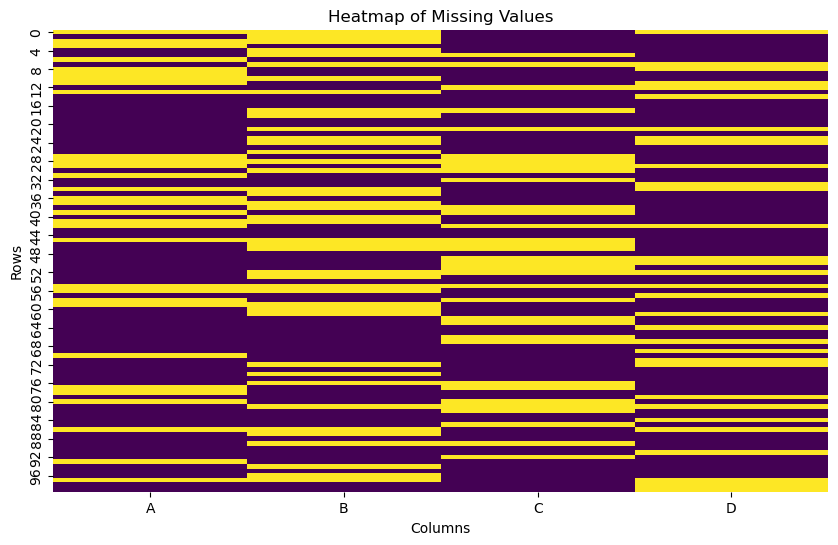

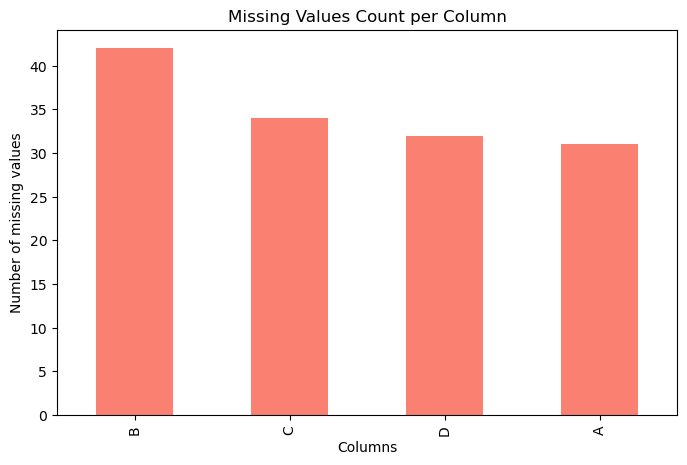

In [ ]:
# show me some graphs to analyze NaN values

import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame with NaN values (replace this with your actual DataFrame)
# For demonstration, we're creating a DataFrame with some random missing values.
np.random.seed(42)
data = {
    'A': np.random.choice([1, 2, np.nan], size=100),
    'B': np.random.choice([3, 4, np.nan], size=100),
    'C': np.random.choice([5, 6, np.nan], size=100),
    'D': np.random.choice([7, 8, np.nan], size=100)
}
df = pd.DataFrame(data)

# -------------------------------
# Plot 1: Heatmap of Missing Values
# -------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

# -------------------------------
# Plot 2: Bar Chart of Missing Values per Column
# -------------------------------
missing_counts = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
missing_counts.plot(kind="bar", color='salmon')
plt.ylabel("Number of missing values")
plt.xlabel("Columns")
plt.title("Missing Values Count per Column")
plt.show()

In [ ]:
all_props_df.fillna(0, inplace=True)


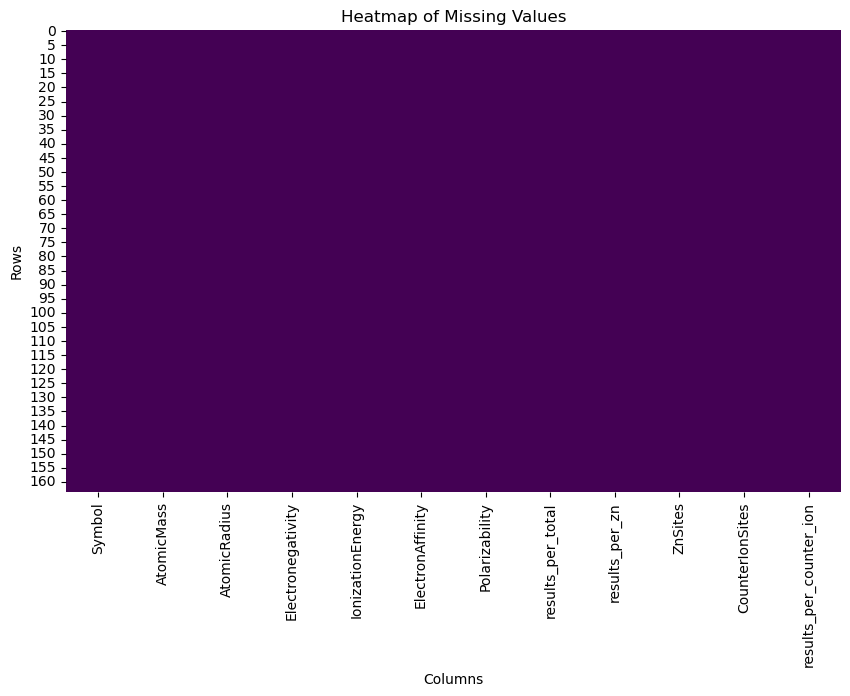

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_props_df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [ ]:
all_props_df.to_csv('all_props_new.csv', index=False)
all_props_df = pd.read_csv('all_props.csv')

all_props_df

,Symbol,AtomicMass,AtomicRadius,Electronegativity,IonizationEnergy,ElectronAffinity,Polarizability,results_per_total,results_per_zn,ZnSites,CounterIonSites,results_per_counter_ion
0,Zn,65.40,139.0,1.65,9.394,NaN,38.67,0.012687,0.038062,1.0,1.0,0.038062
1,Zn,65.40,139.0,1.65,9.394,NaN,38.67,0.008223,0.008855,26.0,26.0,0.008855
2,Zn,65.40,139.0,1.65,9.394,NaN,38.67,0.011320,0.016980,4.0,4.0,0.016980
3,Zn,65.40,139.0,1.65,9.394,NaN,38.67,0.009284,0.011140,10.0,10.0,0.011140
4,Zn,65.40,139.0,1.65,9.394,NaN,38.67,0.010972,0.029258,6.0,6.0,0.029258
...,...,...,...,...,...,...,...,...,...,...,...,...
159,Se,78.97,190.0,2.55,9.752,2.021,28.90,0.002714,0.005429,1.0,1.0,0.005429
160,S,32.07,180.0,2.58,10.360,2.077,19.40,0.002662,0.005324,28.0,28.0,0.005324
161,Te,127.60,206.0,2.10,9.010,1.971,38.00,0.002715,0.005429,3.0,3.0,0.005429
162,Zn,65.40,139.0,1.65,9.394,NaN,38.67,0.015521,0.023282,4.0,4.0,0.023282
